In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

df = pd.read_csv('inputs/europe.csv')
print('Dataset importado')

Dataset importado


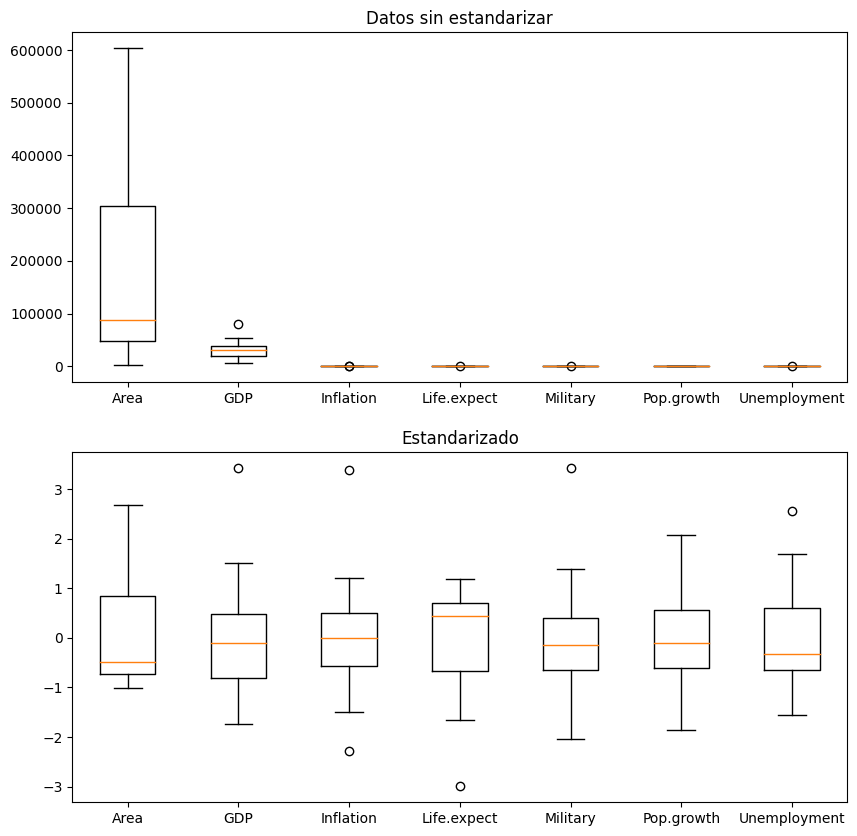

In [20]:
fig, ax = plt.subplots(2, figsize=(10, 10))

country_names = df['Country']

variables_names = df.columns[1:]

df.drop('Country', axis=1, inplace=True)
    
x = df.values

ax[0].boxplot(x, labels=variables_names)
ax[0].set_title('Datos sin estandarizar')

##########################################################################

df = df.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=0)

ax[1].boxplot(df.values, labels=variables_names)
ax[1].set_title('Estandarizado')

plt.show()

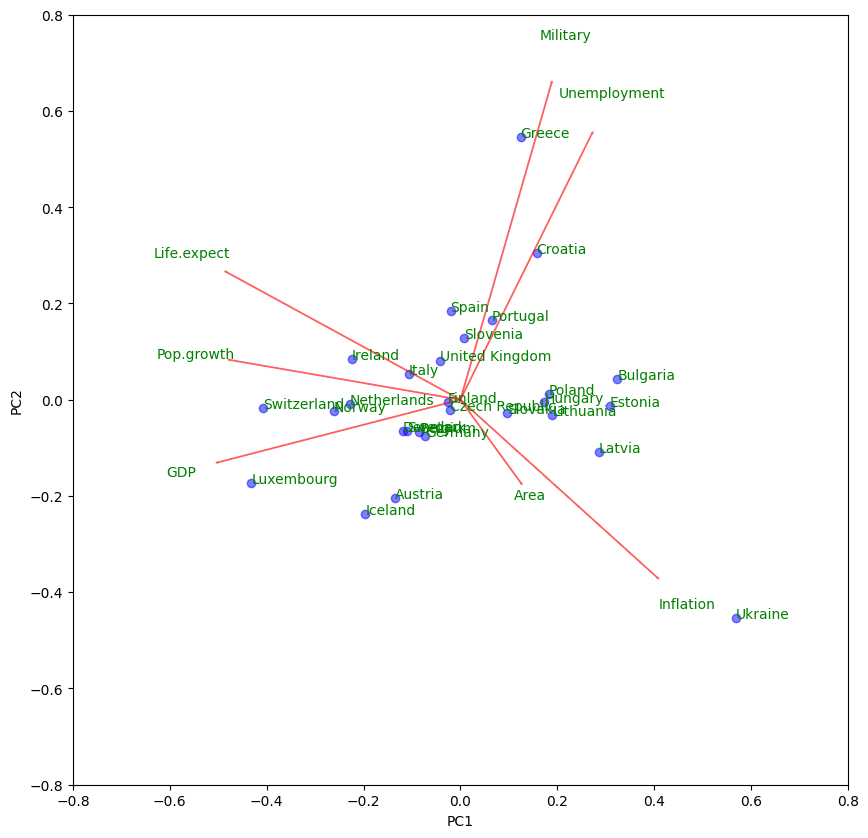

In [27]:
# biplot (PCA)
pca = PCA() # with no components specified, all components are kept          
x_new = pca.fit_transform(df)


def biplot(score, coeff, names, labels=None):
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(10, 10))

    # plot countries
    ax.scatter(xs * scalex, ys * scaley, color='b', alpha=0.5)
    for i in np.arange(len(names)):
        ax.annotate(names[i], (xs[i] * scalex, ys[i] * scaley), color='g') # country names
    
    # plot variables
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5) # variables
        if labels is None:
            ax.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center') # variable names
        else:
            ax.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))

    ax.set_xlim(-0.8, 0.8)
    ax.set_ylim(-0.8, 0.8)
    plt.show()

# call the function. Use only the 2 PCs.
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), country_names, labels=list(df.columns))


